# Leetcode 

2385. Amount of Time for Binary Tree to Be Infected

https://leetcode.com/problems/amount-of-time-for-binary-tree-to-be-infected/description/

**Description**

    You are given the root of a binary tree with unique values, and an integer start. At minute 0, an infection starts from the node with value start.

    Each minute, a node becomes infected if:

    The node is currently uninfected.
    The node is adjacent to an infected node.
    Return the number of minutes needed for the entire tree to be infected.

 
**Examples**


    Example 1:

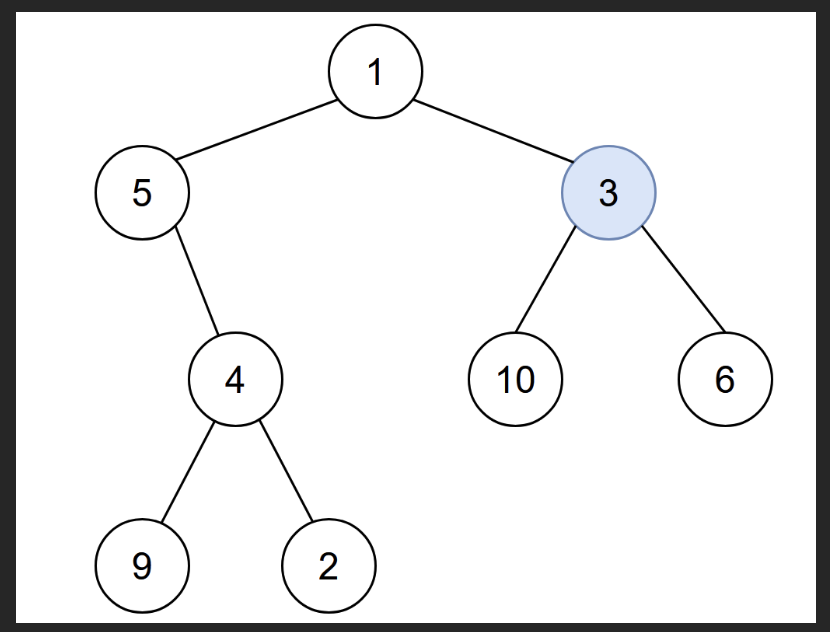

    Input: root = [1,5,3,null,4,10,6,9,2], start = 3
    Output: 4
    Explanation: The following nodes are infected during:
    - Minute 0: Node 3
    - Minute 1: Nodes 1, 10 and 6
    - Minute 2: Node 5
    - Minute 3: Node 4
    - Minute 4: Nodes 9 and 2
    It takes 4 minutes for the whole tree to be infected so we return 4.
    
    Example 2:

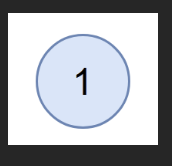


    Input: root = [1], start = 1
    Output: 0
    Explanation: At minute 0, the only node in the tree is infected so we return 0.
    

Constraints:

The number of nodes in the tree is in the range [1, 105].
1 <= Node.val <= 105
Each node has a unique value.
A node with a value of start exists in the tree.


In [1]:
class TreeNode:
    def __init__(self, val=0, left=None, right=None):
        self.val = val
        self.left = left
        self.right = right

In [10]:
from typing import Optional
from collections import defaultdict, deque


class Solution:
    def amountOfTime(self, root: Optional[TreeNode], start: int) -> int:

        graph = defaultdict(list)
        queue = deque([start])
        visited = set()

        def dfs(node):
            if not node:
                return
            if node.left:
                graph[node.val].append(node.left.val)
                graph[node.left.val].append(node.val)
            if node.right:
                graph[node.val].append(node.right.val)
                graph[node.right.val].append(node.val)

            dfs(node.left)
            dfs(node.right)

        dfs(root)
        ans = -1
        while queue:
            ans +=1
            for _ in range(len(queue)):
                cur_node = queue.popleft()
                visited.add(cur_node)
                for neighbor in graph[cur_node]:
                    if neighbor not in visited:
                        queue.append(neighbor)
                
        return ans

In [11]:
root = TreeNode(val= 1, left= TreeNode(
    val= 5, left= None, right= TreeNode(
        val= 4, left= TreeNode(
            val= 9, left= None, right= None), right= TreeNode
            (val= 2, left= None, right= None))), 
            right= TreeNode(val= 3, left= TreeNode(val=10, left= None, right= None),
                             right= TreeNode(val= 6, left=None, right=None)))

start = 3

In [12]:
sol = Solution()
print(sol.amountOfTime(root, start=3))

4


In [13]:
root2 = TreeNode(1, left=None, right=None)
print(sol.amountOfTime(root2,start=1))

0
